# **2-Perform sentiment analysis using Deep Learning**
Using classic and advanced models on our preprocessed textual data.

* [II. Text Models](#ii-text-models)
    - [A. Simple Models](#a-simple-models)
        * [1- DummyClassifier](#1-dummy)
        * [2- Logistic Regression](#2-logistic-regression)
    - [B. Advanced Models](#b-advanced-models)
        * [1- Glove](#1-glove)
        * [2- Word2Vec](#2-word2vec)
        * [3- USE](#3-use)
        * [4- BERT](#4-bert)

* [Results of Models](#results)

In [1]:
import os

# Create the 'glove_emb' folder if it does not exist
if not os.path.exists('../glove_emb'):
    os.makedirs('../glove_emb')

# Create subfolder 'train_tweet_emb' in 'glove_emb' if it does not exist
if not os.path.exists('../glove_emb/train_tweet_emb'):
    os.makedirs('../glove_emb/train_tweet_emb')

If you haven't downloaded the 'glove.twitter.27B.100d.txt', you can downloaded in this link : **https://www.kaggle.com/datasets/bertcarremans/glovetwitter27b100dtxt**.

After you have downloaded the file you must put *'glove.twitter.27B.100d.txt'* on the folder *glove_emb* and *train_tweet_emb*.

In [2]:
glove_embed = '../glove_emb/train_tweet_emb/glove.twitter.27B.100d.txt'
df_clean = '../data/df_clean.csv'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf
import tensorflow_hub as hub
import mlflow
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, GlobalAveragePooling1D, Input, LSTM
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from plot_keras_history import show_history, plot_history
from transformers import BertTokenizer, TFBertModel

c:\Users\julia\Desktop\Projet #7\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Version of the libraries used
print('\n'.join(f'{m.__name__} - {m.__version__}'
                for m in globals().values()
                if getattr(m, '__version__', None)))

numpy - 1.26.3
pandas - 2.2.0
seaborn - 0.13.2
tensorflow - 2.15.0
tensorflow_hub - 0.16.1
mlflow - 2.10.0


To use MLFlow we will use ngrok to have the dashboard

---
<a id='ii-text-models'></a>
# **II. Text Models**
Words Embeddings on different models, first we will try a simple model and then use more sophisticated models already trained in transfer learning.

In [5]:
# Read the cleaned and processing CSV file
df = pd.read_csv(df_clean, encoding='latin1')

In [6]:
display(df)

,target,text
0,0,upset cant update facebook texting might cry r...
1,0,dived many time ball managed save 50 rest go b...
2,0,whole body feel itchy like fire
3,0,behaving im mad cant see
4,0,whole crew
...,...,...
1599994,1,woke school best feeling ever
1599995,1,thewdbcom cool hear old walt interview httpbli...
1599996,1,ready mojo makeover ask detail
1599997,1,happy 38th birthday boo alll time tupac amaru ...


---
<a id='a-simple-models'></a>
### **A. Simple Models**
Basic models usage.

<a id='1-dummy'></a>
**1- DummyClassifier**    

In [7]:
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Creation of the train test split for the dummy, here the model doesn't need to preprocess the text so we don't do any processing on the text.

In [8]:
# Create a DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# Train the DummyClassifier
dummy_clf.fit(X_train, y_train)

# Predict test values
dummy_predictions = dummy_clf.predict(X_test)

In [9]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dummy_predictions)
accuracy = np.round(accuracy, 1)

print(f"The accuracy of the DummyClassifier is: {accuracy}")

The accuracy of the DummyClassifier is: 0.5


<a id='2-logistic-regression'></a>
**2- Logistic Regression**

In [10]:
df_tfidf = df.copy()
y = df_tfidf['target']

# Replace NaN values ​​with an empty string
df_tfidf['text'] = df_tfidf['text'].fillna('')

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Adapt the vectorizer to your data and transform your textual data
X_lr = vectorizer.fit_transform(df_tfidf['text'])

# Split data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y, test_size=0.2, random_state=5)

# Create an instance of LogisticRegression
log_reg = LogisticRegression()

# Train the logistic regression model
log_reg.fit(X_train_lr, y_train_lr)

# Predict test values
log_reg_predictions = log_reg.predict(X_test_lr)

c:\Users\julia\Desktop\Projet #7\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test_lr, log_reg_predictions)
log_reg_accuracy = np.round(log_reg_accuracy, 2)

print(f"The accuracy of logistic regression is: {log_reg_accuracy}")

The accuracy of logistic regression is: 0.78


In [12]:
# Predict test values
log_reg_predictions = log_reg.predict(X_test_lr)

# Generate the classification report
report = classification_report(y_test_lr, log_reg_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.76      0.78    159664
           1       0.77      0.80      0.79    160336

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



We have very good performance, we have a good balance between precision and recall for both classes.

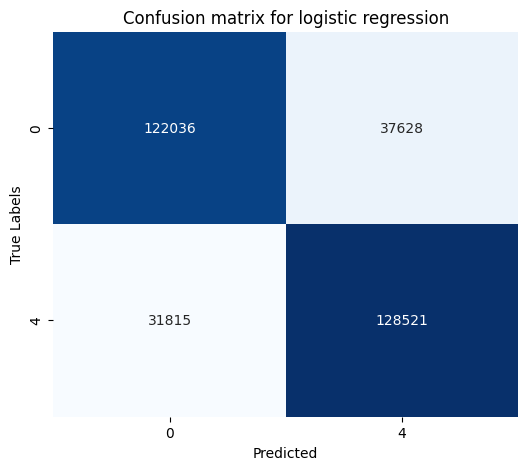

In [13]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_lr, log_reg_predictions)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=[0, 4], columns=[0, 4])

# Create a graph of the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion matrix for logistic regression')
plt.ylabel('True Labels')
plt.xlabel('Predicted')
plt.show()

We see that the class prediction errors are quite low, we have a slightly better performance for the predictions on class 4 (therefore positive) than the negative ones, this can be explained in particular by the fact as we observed previously during exploratory analysis that there is a stronger presence of positive words compared to negative ones.

In [14]:
# Select a random sample from the test set
random_index = random.randint(0, X_test_lr.shape[0]-1)
random_tweet = X_test_lr[random_index]

# Predict the target value for the random tweet
random_tweet_prediction = log_reg.predict(random_tweet)

# Get the actual target value for the random tweet
actual_target_value = y_test_lr.iloc[random_index]

print(f"Tweet: {df_tfidf.loc[random_index, 'text']}")
print(f"True Labels: {actual_target_value}")
print(f"Predicted: {random_tweet_prediction}")

Tweet: know im sorry disappoint
True Labels: 0
Predicted: [0]


---
<a id='b-advanced-models'></a>
### **B. Advanced Models**
Avanced models usage and transfer learning.

In [15]:
# Prepare training data
sentences = df['text'].astype(str)
labels = df['target']

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Transform sentences into sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Padding sequences so that they are all the same length
data = pad_sequences(sequences)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=5)

We tokenize our text and build a train test split to divide our dataset.

<a id='1-glove'></a>
**1.1- Glove**    

In [16]:
# Load GloVe embeddings
embeddings_index = {}
with open(glove_embed, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [17]:
# Prepare the embeddings matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [18]:
# Build the model
model_glove = Sequential()
model_glove.add(Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], trainable=False))
model_glove.add(GlobalAveragePooling1D())
model_glove.add(Dense(2, activation='softmax'))  # 2 is the number of classes

# Compile the model
optimizer = Adam(learning_rate=5e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')

model_glove.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [19]:
# Start an experiment
with mlflow.start_run(run_name="Model Glove"):
    # Log parameters
    mlflow.log_param("optimizer", "Adam")
    mlflow.log_param("learning_rate", 5e-5)
    mlflow.log_param("loss_function", "SparseCategoricalCrossentropy")
    mlflow.log_param("metric", "SparseCategoricalAccuracy")
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 4)

    # Train the model
    start_time = time.time()
    history_glove = model_glove.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=4)
    end_time = time.time()

    # Log model
    mlflow.sklearn.log_model(model_glove, "model_glove")

    # Register model to the model registry
    run_id = mlflow.active_run().info.run_id
    mlflow.register_model(f"runs:/{run_id}/model", "Model Glove")

    # Log metrics
    mlflow.log_metric("accuracy", history_glove.history['accuracy'][-1])
    mlflow.log_metric("val_accuracy", history_glove.history['val_accuracy'][-1])

time_glove = end_time - start_time
print(f"Training Time --> {time_glove}")

Epoch 1/4



c:\Users\julia\Desktop\Projet #7\.env\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


30000/30000 [==============================] - 37s 1ms/step - loss: 0.6292 - accuracy: 0.6868 - val_loss: 0.5939 - val_accuracy: 0.7053
Epoch 2/4
30000/30000 [==============================] - 35s 1ms/step - loss: 0.5809 - accuracy: 0.7113 - val_loss: 0.5715 - val_accuracy: 0.7155
Epoch 3/4
30000/30000 [==============================] - 40s 1ms/step - loss: 0.5660 - accuracy: 0.7189 - val_loss: 0.5617 - val_accuracy: 0.7209
Epoch 4/4
30000/30000 [==============================] - 41s 1ms/step - loss: 0.5586 - accuracy: 0.7231 - val_loss: 0.5562 - val_accuracy: 0.7242
Training Time --> 151.81485104560852


c:\Users\julia\Desktop\Projet #7\.env\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'Model Glove'.
Created version '1' of model 'Model Glove'.


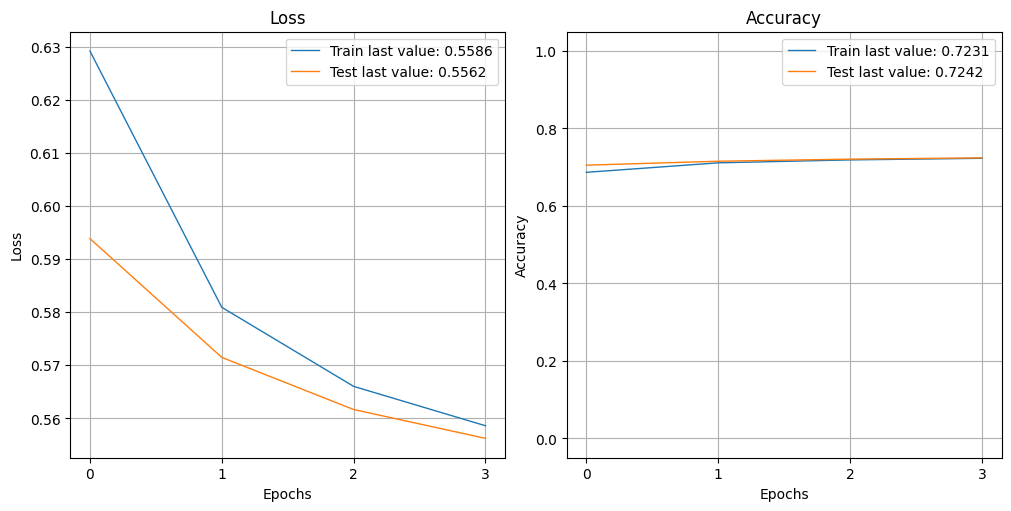

In [20]:
show_history(history_glove)
plot_history(history_glove, path="../history_models/history_glove.png")
plt.close()

In [21]:
# Evaluate the model on the test set
loss, accuracy_glove = model_glove.evaluate(X_test, y_test, verbose=0)
print('Loss: %.2f' % loss)
print('Accuracy: %.2f' % (accuracy_glove*100))

Loss: 0.56
Accuracy: 72.39


**1.2- Glove with LSTM**

In [22]:
# Build the model
model_glove_lstm = Sequential()
model_glove_lstm.add(Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], trainable=False))
model_glove_lstm.add(LSTM(128))  # Add the LSTM layer
model_glove_lstm.add(Dense(2, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=5e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')

model_glove_lstm.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [23]:
# Start an experiment
with mlflow.start_run(run_name="Model Glove with LSTM"):
    # Log parameters
    mlflow.log_param("optimizer", "Adam")
    mlflow.log_param("learning_rate", 5e-5)
    mlflow.log_param("loss_function", "SparseCategoricalCrossentropy")
    mlflow.log_param("metric", "SparseCategoricalAccuracy")
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 4)

    # Train the model
    start_time = time.time()
    history_glove_lstm = model_glove_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=4)
    end_time = time.time()

    # Log model
    mlflow.sklearn.log_model(model_glove_lstm, "model_glove_lstm")

    # Register model to the model registry
    run_id = mlflow.active_run().info.run_id
    mlflow.register_model(f"runs:/{run_id}/model", "Model Glove with LSTM")

    # Log metrics
    mlflow.log_metric("accuracy", history_glove_lstm.history['accuracy'][-1])
    mlflow.log_metric("val_accuracy", history_glove_lstm.history['val_accuracy'][-1])

time_glove_lstm = end_time - start_time
print(f"Training Time --> {time_glove_lstm}")

Epoch 1/4
30000/30000 [==============================] - 405s 13ms/step - loss: 0.5028 - accuracy: 0.7527 - val_loss: 0.4841 - val_accuracy: 0.7642
Epoch 2/4
30000/30000 [==============================] - 424s 14ms/step - loss: 0.4722 - accuracy: 0.7730 - val_loss: 0.4684 - val_accuracy: 0.7748
Epoch 3/4
30000/30000 [==============================] - 390s 13ms/step - loss: 0.4616 - accuracy: 0.7797 - val_loss: 0.4593 - val_accuracy: 0.7815
Epoch 4/4
30000/30000 [==============================] - 388s 13ms/step - loss: 0.4549 - accuracy: 0.7840 - val_loss: 0.4563 - val_accuracy: 0.7826
Training Time --> 1607.0907094478607


Successfully registered model 'Model Glove with LSTM'.
Created version '1' of model 'Model Glove with LSTM'.


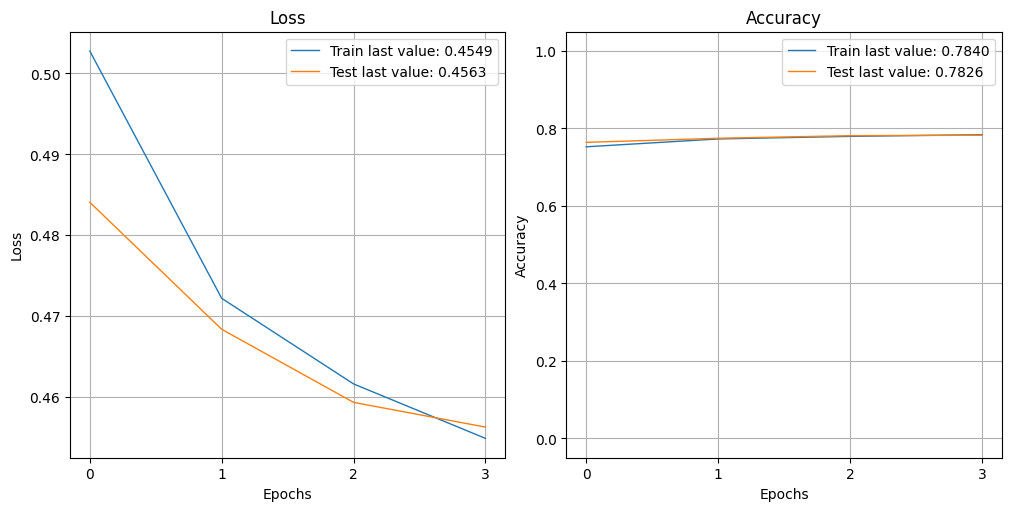

In [24]:
show_history(history_glove_lstm)
plot_history(history_glove_lstm, path="../history_models/history_glove_lstm.png")
plt.close()

In [25]:
# Evaluate the model on the test set
loss, accuracy_glove_lstm = model_glove_lstm.evaluate(X_test, y_test, verbose=0)
print('Loss: %.2f' % loss)
print('Accuracy: %.2f' % (accuracy_glove_lstm*100))

Loss: 0.46
Accuracy: 78.18


<a id='2-word2vec'></a>
**2.1- Word2Vec**    

In [26]:
# Train Word2Vec model
word2vec = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [27]:
# Prepare the embeddings matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec.wv:
        embedding_matrix[i] = word2vec.wv[word]

In [28]:
# Build the model
model_word2vec = Sequential()
model_word2vec.add(Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], trainable=False))
model_word2vec.add(GlobalAveragePooling1D())
model_word2vec.add(Dense(2, activation='softmax'))  # 2 is the number of classes

# Compile the model
optimizer = Adam(learning_rate=5e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')

model_word2vec.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [29]:
# Start an experiment
with mlflow.start_run(run_name="Model Word2Vec"):
    # Log parameters
    mlflow.log_param("optimizer", "Adam")
    mlflow.log_param("learning_rate", 5e-5)
    mlflow.log_param("loss_function", "SparseCategoricalCrossentropy")
    mlflow.log_param("metric", "SparseCategoricalAccuracy")
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 4)

    # Train the model
    start_time = time.time()
    history_word2vec = model_word2vec.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=4)
    end_time = time.time()

    # Log model
    mlflow.sklearn.log_model(model_word2vec, "model_word2vec")

    # Register model to the model registry
    run_id = mlflow.active_run().info.run_id
    mlflow.register_model(f"runs:/{run_id}/model", "Model Word2Vec")

    # Log metrics
    mlflow.log_metric("accuracy", history_word2vec.history['accuracy'][-1])
    mlflow.log_metric("val_accuracy", history_word2vec.history['val_accuracy'][-1])

time_word2vec = end_time - start_time
print(f"Training Time --> {time_word2vec}")

Epoch 1/4
30000/30000 [==============================] - 42s 1ms/step - loss: 0.6926 - accuracy: 0.5050 - val_loss: 0.6924 - val_accuracy: 0.5070
Epoch 2/4
30000/30000 [==============================] - 38s 1ms/step - loss: 0.6924 - accuracy: 0.5068 - val_loss: 0.6923 - val_accuracy: 0.5075
Epoch 3/4
30000/30000 [==============================] - 39s 1ms/step - loss: 0.6923 - accuracy: 0.5070 - val_loss: 0.6922 - val_accuracy: 0.5066
Epoch 4/4
30000/30000 [==============================] - 37s 1ms/step - loss: 0.6923 - accuracy: 0.5070 - val_loss: 0.6922 - val_accuracy: 0.5078
Training Time --> 155.81365990638733


Successfully registered model 'Model Word2Vec'.
Created version '1' of model 'Model Word2Vec'.


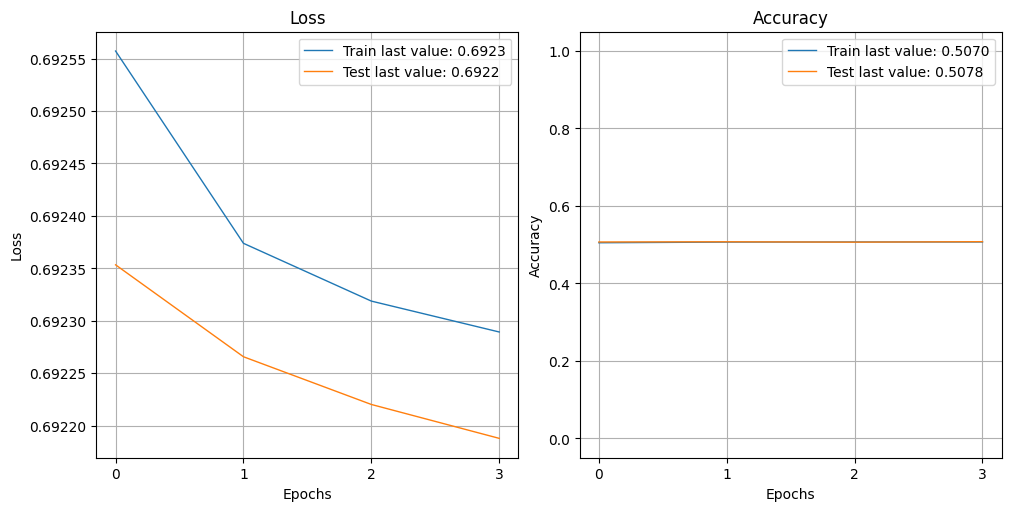

In [30]:
show_history(history_word2vec)
plot_history(history_word2vec, path="../history_models/history_word2vec.png")
plt.close()

In [31]:
# Evaluate the model on the test set
loss, accuracy_word2vec = model_word2vec.evaluate(X_test, y_test, verbose=0)
print('Loss: %.2f' % loss)
print('Accuracy: %.2f' % (accuracy_word2vec*100))

Loss: 0.69
Accuracy: 50.86


**2.2- Word2Vec with LSTM**    

In [32]:
# Build the model
model_word2vec_lstm = Sequential()
model_word2vec_lstm.add(Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], trainable=False))
model_word2vec_lstm.add(LSTM(128))  # Add the LSTM
model_word2vec_lstm.add(Dense(2, activation='softmax'))  # 2 is the number of classes

# Compile the model
optimizer = Adam(learning_rate=5e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')

model_word2vec_lstm.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [33]:
# Start an experiment
with mlflow.start_run(run_name="Model Word2Vec with LSTM"):
    # Log parameters
    mlflow.log_param("optimizer", "Adam")
    mlflow.log_param("learning_rate", 5e-5)
    mlflow.log_param("loss_function", "SparseCategoricalCrossentropy")
    mlflow.log_param("metric", "SparseCategoricalAccuracy")
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 4)

    # Train the model
    start_time = time.time()
    history_word2vec_lstm = model_word2vec_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=4)
    end_time = time.time()

    # Log model
    mlflow.sklearn.log_model(model_word2vec_lstm, "model_word2vec_lstm")

    # Register model to the model registry
    run_id = mlflow.active_run().info.run_id
    mlflow.register_model(f"runs:/{run_id}/model", "Model Word2Vec with LSTM")

    # Log metrics
    mlflow.log_metric("accuracy", history_word2vec_lstm.history['accuracy'][-1])
    mlflow.log_metric("val_accuracy", history_word2vec_lstm.history['val_accuracy'][-1])

time_word2vec_lstm = end_time - start_time
print(f"Training Time --> {time_word2vec_lstm}")

Epoch 1/4
30000/30000 [==============================] - 416s 14ms/step - loss: 0.6921 - accuracy: 0.5083 - val_loss: 0.6920 - val_accuracy: 0.5088
Epoch 2/4
30000/30000 [==============================] - 379s 13ms/step - loss: 0.6920 - accuracy: 0.5084 - val_loss: 0.6920 - val_accuracy: 0.5078
Epoch 3/4
30000/30000 [==============================] - 391s 13ms/step - loss: 0.6919 - accuracy: 0.5077 - val_loss: 0.6918 - val_accuracy: 0.5089
Epoch 4/4
30000/30000 [==============================] - 403s 13ms/step - loss: 0.6918 - accuracy: 0.5071 - val_loss: 0.6918 - val_accuracy: 0.5079
Training Time --> 1589.7400081157684


Successfully registered model 'Model Word2Vec with LSTM'.
Created version '1' of model 'Model Word2Vec with LSTM'.


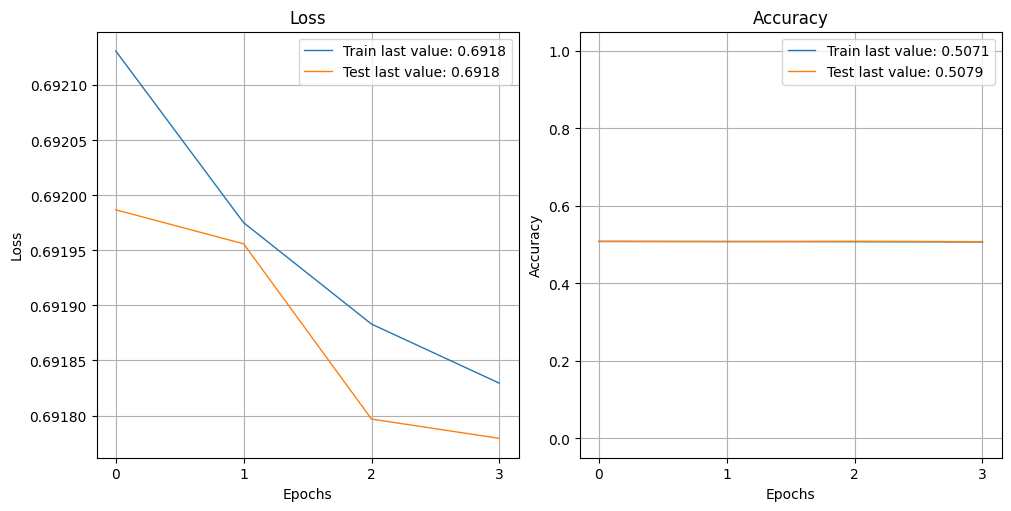

In [34]:
show_history(history_word2vec_lstm)
plot_history(history_word2vec_lstm, path="../history_models/history_word2vec_lstm.png")
plt.close()

In [35]:
# Evaluate the model on the test set
loss, accuracy_word2vec_lstm = model_word2vec_lstm.evaluate(X_test, y_test, verbose=0)
print('Loss: %.2f' % loss)
print('Accuracy: %.2f' % (accuracy_word2vec_lstm*100))

Loss: 0.69
Accuracy: 50.65


---

We will use 2 larger models than Word2Vec and Glove so here we will divide the data into smaller batches to prevent the RAM from blocking.

<a id='3-use'></a>
**3- USE**

In [36]:
# Prepare training data
sentences = df['text'].astype(str)
labels = df['target']

# Load the Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Initialize an array for the embeddings
embeddings = np.zeros((len(sentences), 512))

# Use USE to vectorize sentences in batches to avoid memory issues
batch_size = 32
for i in range(0, len(sentences), batch_size):
    batch = sentences[i:i+batch_size]
    embeddings[i:i+batch_size] = embed(batch)

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=5)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=5)

In [38]:
# Build the model
model_use = Sequential()
model_use.add(Dense(512, input_shape=(512,), activation='relu'))
model_use.add(Dense(2, activation='softmax'))  # 2 is the number of classes

# Compile the model
optimizer = Adam(learning_rate=5e-5)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')

model_use.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [39]:
# Start an experiment
with mlflow.start_run(run_name="Model USE"):
    # Log parameters
    mlflow.log_param("optimizer", "Adam")
    mlflow.log_param("learning_rate", 5e-5)
    mlflow.log_param("loss_function", "SparseCategoricalCrossentropy")
    mlflow.log_param("metric", "SparseCategoricalAccuracy")
    mlflow.log_param("batch_size", batch_size)
    mlflow.log_param("epochs", 4)

    # Train the model
    start_time = time.time()
    history_use = model_use.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=4)
    end_time = time.time()

    # Log model
    mlflow.sklearn.log_model(model_use, "model_use")

    # Register model to the model registry
    run_id = mlflow.active_run().info.run_id
    mlflow.register_model(f"runs:/{run_id}/model", "Model USE")

    # Log metrics
    mlflow.log_metric("accuracy", history_use.history['accuracy'][-1])
    mlflow.log_metric("val_accuracy", history_use.history['val_accuracy'][-1])

time_use = end_time - start_time
print(f"Training Time --> {time_use}")

Epoch 1/4


c:\Users\julia\Desktop\Projet #7\.env\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


30000/30000 [==============================] - 77s 3ms/step - loss: 0.5021 - accuracy: 0.7539 - val_loss: 0.4872 - val_accuracy: 0.7624
Epoch 2/4
30000/30000 [==============================] - 87s 3ms/step - loss: 0.4817 - accuracy: 0.7661 - val_loss: 0.4776 - val_accuracy: 0.7686
Epoch 3/4
30000/30000 [==============================] - 88s 3ms/step - loss: 0.4730 - accuracy: 0.7717 - val_loss: 0.4734 - val_accuracy: 0.7713
Epoch 4/4
30000/30000 [==============================] - 73s 2ms/step - loss: 0.4675 - accuracy: 0.7751 - val_loss: 0.4704 - val_accuracy: 0.7731
Training Time --> 330.54034900665283


Successfully registered model 'Model USE'.
Created version '1' of model 'Model USE'.


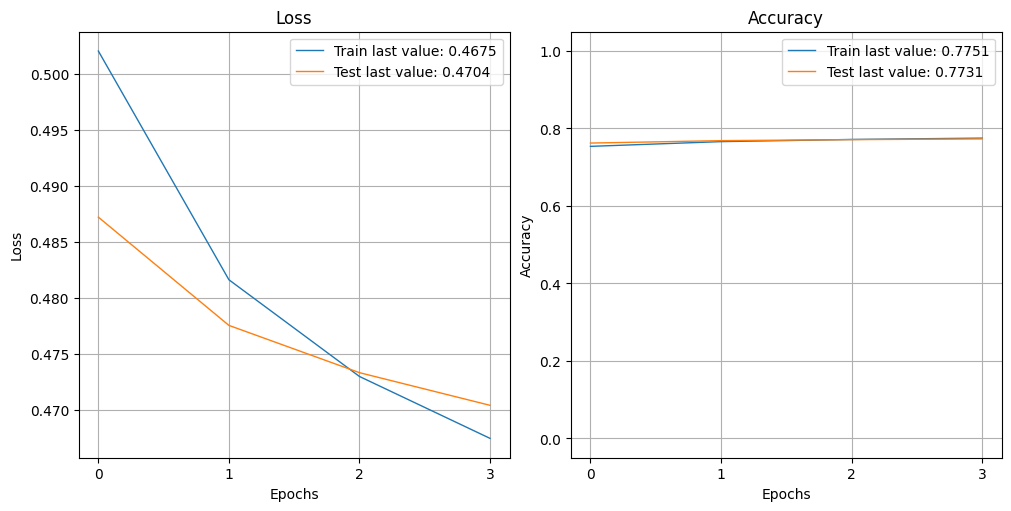

In [40]:
show_history(history_use)
plot_history(history_use, path="../history_models/history_use.png")
plt.close()

In [41]:
# Evaluate the model on the test set
loss, accuracy_use = model_use.evaluate(X_test, y_test, verbose=0)
print('Loss: %.2f' % loss)
print('Accuracy: %.2f' % (accuracy_use*100))

Loss: 0.47
Accuracy: 77.19


<a id='4-bert'></a>
**4- BERT**    

We will test to see if BERT has good performance, here for computational reasons we cannot train BERT on all our data so we will only take 1% of our data in balanced class.

This will allow us to have a point of view with this analysis to see the performance contribution of a BERT model.

In [42]:
# Get balanced data
class_0 = df[df['target'] == 0].sample(frac=0.01)  # 1% of class 0
class_1 = df[df['target'] == 1].sample(frac=0.01)  # 1% of class 1
balanced_df = pd.concat([class_0, class_1])

# Prepare training data
sentences = balanced_df['text'].astype(str)
labels = balanced_df['target'].values

# Load BERT and the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [43]:
# Tokenize sentences
input_ids = []
attention_masks = []

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
        sent,
        add_special_tokens = True,
        max_length = 64,
        pad_to_max_length = True,
        return_attention_mask = True,
        return_tensors = 'tf',
    )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\julia\Desktop\Projet #7\.env\Lib\site-packages\transformers\tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [44]:
# Convert tensors to numpy arrays
input_ids = input_ids.numpy()
attention_masks = attention_masks.numpy()  # Convert attention masks to numpy arrays

# Split data into training, validation and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(input_ids, labels, test_size=0.4, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=5)

# Similarly, split the attention masks
attention_masks_train, attention_masks_temp = train_test_split(attention_masks, test_size=0.4, random_state=5)
attention_masks_val, attention_masks_test = train_test_split(attention_masks_temp, test_size=0.5, random_state=5)

In [45]:
# Build the model
input_word_ids = Input(shape=(64,), dtype=tf.int32, name="input_word_ids")
input_mask = Input(shape=(64,), dtype=tf.int32, name="input_mask")
embeddings = model(input_word_ids, attention_mask=input_mask)[0]
x = tf.keras.layers.GlobalAveragePooling1D()(embeddings)
x = Dense(512, activation='relu')(x)
out = Dense(2, activation='softmax')(x)  # 2 is the number of classes

model_bert = Model(inputs=[input_word_ids, input_mask], outputs=out)

# Compile the model
optimizer = Adam(learning_rate=5e-5)
loss = SparseCategoricalCrossentropy(from_logits=False)
metric = SparseCategoricalAccuracy('accuracy')

model_bert.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [46]:
# Start an experiment
with mlflow.start_run(run_name="Model BERT"):
    # Log parameters
    mlflow.log_param("optimizer", "Adam")
    mlflow.log_param("learning_rate", 5e-5)
    mlflow.log_param("loss_function", "SparseCategoricalCrossentropy")
    mlflow.log_param("metric", "SparseCategoricalAccuracy")
    mlflow.log_param("batch_size", 64)
    mlflow.log_param("epochs", 1)

    # Train the model
    start_time = time.time()
    history_bert = model_bert.fit([X_train, attention_masks[:len(X_train)]], y_train, validation_data=([X_val, attention_masks[len(X_train):len(X_train)+len(X_val)]], y_val),
                                batch_size=64, epochs=1)
    end_time = time.time()

    # Log model
    mlflow.sklearn.log_model(model_bert, "model_bert")

    # Register model to the model registry
    run_id = mlflow.active_run().info.run_id
    mlflow.register_model(f"runs:/{run_id}/model", "Model BERT")

    # Log metrics
    mlflow.log_metric("accuracy", history_bert.history['accuracy'][-1])
    mlflow.log_metric("val_accuracy", history_bert.history['val_accuracy'][-1])

time_bert = end_time - start_time
print(f"Training Time --> {time_bert}")

150/150 [==============================] - 1614s 11s/step - loss: 0.6166 - accuracy: 0.6440 - val_loss: 0.5682 - val_accuracy: 0.6834


c:\Users\julia\Desktop\Projet #7\.env\Lib\site-packages\transformers\generation\tf_utils.py:465: UserWarning: `seed_generator` is deprecated and will be removed in a future version.
  warnings.warn("`seed_generator` is deprecated and will be removed in a future version.", UserWarning)
2024/01/31 15:44:33 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\julia\AppData\Local\Temp\tmpz6mi224d\model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.4.0', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback.


Training Time --> 1614.1249554157257


Successfully registered model 'Model BERT'.
Created version '1' of model 'Model BERT'.


In [47]:
# Evaluate the model on the test set
loss, accuracy_bert = model_bert.evaluate([X_test, attention_masks_test], y_test, verbose=0)
print('Loss: %.2f' % loss)
print('Accuracy: %.2f' % (accuracy_bert*100))

Loss: 0.53
Accuracy: 73.56


---
---

<a id='results'></a>
## **Results of Models** 

To see on the MLFlow dashboard we need to start the local server, first you need to put you in a shell in *notebooks* folder so do the commande : ```cd notebooks``` and after you can execute the command ```mlflow ui```.

Now we can observe the results of our models on the local address: **http://localhost:5000**.

In [48]:
# Create a dictionary with the model names and their accuracies
data = {'Model': ['GloVe', 'Glove (LSTM)', 'Word2Vec', 'Word2Vec (LSTM)', 'USE', 'BERT'],
        'Accuracy %': [accuracy_glove*100, accuracy_glove_lstm*100, accuracy_word2vec*100, accuracy_word2vec_lstm*100, accuracy_use*100, accuracy_bert*100],
        'Train Time (min)': [time_glove/60, time_glove_lstm/60, time_word2vec/60, time_word2vec_lstm/60, time_use/60, time_bert/60],
        }

# Create DataFrame
df_bilan = pd.DataFrame(data)
display(df_bilan)

,Model,Accuracy %,Train Time (min)
0,GloVe,72.388440,2.530248
1,Glove (LSTM),78.184062,26.784845
2,Word2Vec,50.857502,2.596894
3,Word2Vec (LSTM),50.650311,26.495667
4,USE,77.187812,5.509006
5,BERT,73.562503,26.902083
